<a target="_blank" href="https://colab.research.google.com/github/jvictorferreira3301/SimulacaoBPSK/blob/main/bpsk_simulation.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

**Faculdade de Engenharia da Computação e Telecomunicações - Universidade Federal do Pará**

**Professor**: Lamartine Vilar de Souza

**Aluno**: Joao Victor Santos Brito Ferreira

# Trabalho de Teoria das Comunicações – Simulação de uma Modulação Digital (versão 4.2024)

Simulação (usando a linguagem python) de uma modulação digital (exceto ASK) mostrando o
comportamento da modulação de um sinal digital arbitrário frente a 4 diferentes potências de
ruido AWGN (0 mW, 10 mW, 50 mW e 300 mW). A simulação deve mostrar, graficamente, o
comportamento do sinal demodulado depois de sofrer o impacto do ruído. A simulação deve
mostrar ainda, graficamente, o impacto dos 4 níveis de ruído anteriores na BER (Taxa de Erro de
Bit) do sistema, ou seja, um gráfico BER x potências do ruído deve ser apresentado. A BER deve
ser apresentada em função do valor de 10-6. O trabalho deve apresentar uma breve discussão sobre
os resultados obtidos.

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import ipywidgets as widgets
from IPython.display import display

In [79]:
def stringToBinaryASCII(input: str) -> str:
    """
    Converte uma string em sua representação binária ASCII.

    Args:
        input (str): A string a ser convertida.

    Returns:
        str: A representação binária ASCII da string.
    """
    binaryRes = ' '.join(format(ord(char), '08b') for char in input)
    return binaryRes

def binaryASCIItoString(binary_string: str) -> str:
    """
    Converte uma string binária ASCII de volta para uma string de caracteres.

    Args:
        binary_string (str): A string binária ASCII a ser convertida.

    Returns:
        str: A string de caracteres correspondente.
    """
    binaryValues = binary_string.split(' ')
    asciiChars = [chr(int(binary, 2)) for binary in binaryValues]
    return ''.join(asciiChars)


## $I$. Simulação de Modulação Digital (BPSK):

- A função bpsk_transmission é chamada com diferentes potências de ruído (0 mW, 10 mW, 50 mW, 300 mW)


In [80]:
def bpsk_transmission(noisePower: float) -> tuple:
    """
    Realiza a transmissão e demodulação BPSK com uma dada potência de ruído.

    Args:
        noisePower (float): A potência do ruído em mW.

    Returns:
        tuple: Contém os sinais de entrada, portadora, sinal BPSK modulado, sinal BPSK com ruído,
               sinal demodulado, bits demodulados e a BER.
    """
    noise = np.sqrt(noisePower) * np.random.randn(N)
    
    txSignalToModulation = (np.tile(txSignal*2-1, (1, Ns))).ravel()
    carrier = np.sin(2 * np.pi * f0 * t)
    bpskSignal = txSignalToModulation * carrier
    bpskSignalNoise = bpskSignal + noise

    # Demodulação
    receivedSignal = bpskSignalNoise * carrier
    b, a = signal.butter(5, 2*f0/fs)
    demodulatedSignal = signal.lfilter(b, a, receivedSignal)
    demodulatedBits = demodulatedSignal.reshape((Nbits, Ns)).mean(axis=1) > 0
    demodulatedBits = demodulatedBits * 2 - 1  # Converte de volta para -1 e 1

    # Calcula BER
    txBits = txSignal.ravel() * 2 - 1
    ber = np.sum(txBits != demodulatedBits) / Nbits

    return txSignalToModulation, carrier, bpskSignal, bpskSignalNoise, demodulatedSignal, demodulatedBits, ber

## $II$. Gráficos do Comportamento do Sinal Demodulado:

- A função simulate_bpsk gera gráficos que mostram o sinal da portadora, o sinal de entrada, o sinal BPSK modulado, o sinal BPSK recebido com ruído, o sinal demodulado com filtro passa-baixa (LPF) e os bits demodulados com LPF.


In [81]:
def simulate_bpsk(noisePower: float) -> None:
    """
    Simula a modulação BPSK com uma dada potência de ruído e plota os sinais relevantes.

    Args:
        noisePower (float): A potência do ruído em mW.
    """
    txSignalToModulation, carrier, bpskSignal, bpskSignalNoise, demodulatedSignal, demodulatedBits, ber = bpsk_transmission(noisePower)

    # Converte bits demodulados de volta para string ASCII
    demodulatedBitsString = ''.join(['1' if bit == 1 else '0' for bit in demodulatedBits])
    demodulatedMessage = binaryASCIItoString(' '.join([demodulatedBitsString[i:i+8] for i in range(0, len(demodulatedBitsString), 8)]))
    print("Mensagem demodulada: ", demodulatedMessage)
    print(f"BER: {ber}")

    # Plots of BPSK
    fig, axis = plt.subplots(6, 1, figsize=(10, 15))
    fig.suptitle(f'BPSK Modulation with Noise Power {noisePower} mW', fontsize=12)

    axis[0].plot(t, carrier, color='C2')
    axis[0].set_title('Carrier Signal')
    axis[0].set_xlabel('Time')
    axis[0].set_xlim(0, timeDomainVisibleLimit)
    axis[0].set_ylabel('Amplitude')
    axis[0].grid(linestyle='dotted')

    axis[1].plot(t, txSignalToModulation, color='C1')
    axis[1].set_title('Input Signal')
    axis[1].set_xlabel('Time')
    axis[1].set_xlim(0, timeDomainVisibleLimit)
    axis[1].set_ylabel('Amplitude')
    axis[1].grid(linestyle='dotted')

    axis[2].plot(t, bpskSignal, color='C3')
    axis[2].set_title('BPSK Modulated Signal')
    axis[2].set_xlabel('Time')
    axis[2].set_xlim(0, timeDomainVisibleLimit)
    axis[2].set_ylabel('Amplitude')
    axis[2].grid(linestyle='dotted')

    axis[3].plot(t, bpskSignalNoise, color='C4')
    axis[3].set_title('Received BPSK Signal with Noise')
    axis[3].set_xlabel('Time')
    axis[3].set_xlim(0, timeDomainVisibleLimit)
    axis[3].set_ylabel('Amplitude')
    axis[3].grid(linestyle='dotted')

    axis[4].plot(t, demodulatedSignal, color='C5')
    axis[4].set_title('Demodulated Signal with LPF')
    axis[4].set_xlabel('Time')
    axis[4].set_xlim(0, timeDomainVisibleLimit)
    axis[4].set_ylabel('Amplitude')
    axis[4].grid(linestyle='dotted')

    demodulatedBitsTime = np.repeat(demodulatedBits, Ns)
    axis[5].plot(t, demodulatedBitsTime, color='C6')
    axis[5].set_title('Demodulated Bits with LPF')
    axis[5].set_xlabel('Time')
    axis[5].set_xlim(0, timeDomainVisibleLimit)
    axis[5].set_ylabel('Amplitude')
    axis[5].grid(linestyle='dotted')

    plt.subplots_adjust(hspace=1)
    plt.show()

## $III$. Gráfico BER x Potências do Ruído::

- A função plot_ber_vs_noise calcula a BER para diferentes níveis de potência do ruído e plota o gráfico da BER em função da potência do ruído.

- A escala do eixo y no gráfico BER x Potências do Ruído é logarítmica, permitindo visualizar a BER em função de 10^-6.

In [82]:
def plot_ber_vs_noise() -> None:
    """
    Calcula e plota a BER em função da potência do ruído para diferentes níveis de ruído.
    """
    noise_powers = [0, 10, 50, 300]
    bers = []

    for noisePower in noise_powers:
        _, _, _, _, _, _, ber = bpsk_transmission(noisePower)
        bers.append(ber)

    # Plot BER vs Noise Power
    plt.figure(figsize=(10, 6))
    plt.plot(noise_powers, bers, marker='o')
    plt.yscale('log')
    plt.title('BER vs Noise Power')
    plt.xlabel('Noise Power (mW)')
    plt.ylabel('BER')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

# Cria um widget para selecionar o nível de ruído
noise_power_widget = widgets.SelectionSlider(
    options=[0, 10, 50, 300],
    value=10,
    description='Noise Power (mW):',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True
)

In [83]:
# Solicita a mensagem de texto do usuário
txMessage = input("Digite a mensagem a ser transmitida: ")

# Converte a mensagem para binário ASCII
txSignal = stringToBinaryASCII(txMessage)
print("Mensagem digitada: ", txMessage)
print("Mensagem a ser transmitida: ", txSignal)
txSignal = [*txSignal.replace(' ', '')]
txSignal = [int(x) for x in txSignal]
txSignal = np.array(txSignal)[:, None]

# Define parâmetros
fs = 44100  # taxa de amostragem
baud = 900  # taxa de símbolos
Nbits = len(txSignal)   # número de bits
f0 = 1800   # frequência da portadora
Ns = int(fs/baud)   # número de amostras por símbolo
N = Nbits * Ns  # número total de amostras
t = np.r_[0.0:N]/fs # pontos de tempo
f = np.r_[0:N/2.0]/N*fs # pontos de frequência

# Limite para representação de sinais no domínio do tempo para melhor visibilidade
symbolsToShow = 20
timeDomainVisibleLimit = np.minimum(Nbits/baud, symbolsToShow/baud)

Mensagem digitada:  Lamartine Vilar de Souza
Mensagem a ser transmitida:  01001100 01100001 01101101 01100001 01110010 01110100 01101001 01101110 01100101 00100000 01010110 01101001 01101100 01100001 01110010 00100000 01100100 01100101 00100000 01010011 01101111 01110101 01111010 01100001


In [84]:
# Conecta o widget à função de simulação
output = widgets.interactive_output(simulate_bpsk, {'noisePower': noise_power_widget})
display(noise_power_widget, output)

SelectionSlider(continuous_update=False, description='Noise Power (mW):', index=1, options=(0, 10, 50, 300), v…

Output()

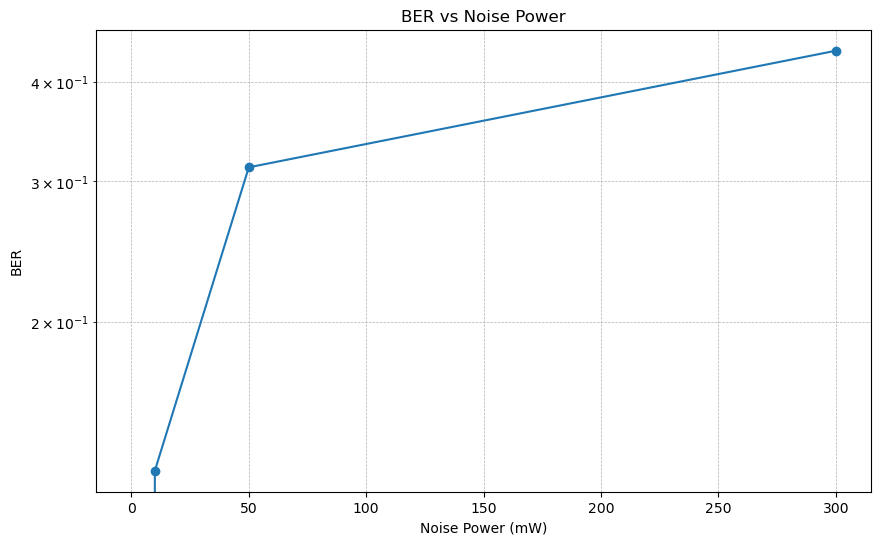

In [87]:
# Plota BER vs Noise Power
plot_ber_vs_noise()